In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from pybaseball import lahman
lahman.download_lahman()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.special import expit

In [23]:
attendance = pd.read_csv("attendance_data.csv")
vegas = pd.read_csv("vegas_odds_data1.csv")
standings = pd.read_csv("standings.csv")

In [24]:
attendance = attendance.dropna()
vegas = vegas.dropna()
standings = standings.dropna()
attendance
vegas
standings

,RK,TEAM,HM_GMS,HM_TOTAL,HM_AVG,HM_PCT,AW_GMS,AW_AVG,AW_PCT,GMS,AVG,PCT,abbrv,year,team_season_id
0,1,Chicago,34,"729,000","21,441",108.7,36,"17,462",97.5,70,"19,395",103.2,chi,2019,chi2019
1,2,Montreal,37,"780,155","21,085",99.1,34,"17,553",96.1,71,"19,393",97.8,mtl,2019,mtl2019
2,3,Dallas,34,"691,084","20,326",113,35,"17,282",95.7,69,"18,782",104.2,dal,2019,dal2019
3,4,Toronto,34,"656,261","19,301",102.6,36,"17,845",97.5,70,"18,552",100,tor,2019,tor2019
4,5,Tampa_Bay,34,"643,375","18,922",99.9,36,"16,957",94,70,"17,912",97,tbl,2019,tbl2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,26,New_Jersey,41,583448,14230,--,41,16735,--,82,15483,--,njd,2005,njd2005
419,27,St._Louis,41,582742,14213,--,41,16774,--,82,15494,--,stl,2005,stl2005
420,28,Washington,41,570113,13905,--,41,16522,--,82,15214,--,wsh,2005,wsh2005
421,29,Chicago,41,546075,13318,--,41,16729,--,82,15024,--,chi,2005,chi2005


,year,X2,mid_June,October,Nov1,Dec1,Jan1,all_star_break,Mar1,abbrv,...,Nov1_pct,Dec1_pct,Jan1_pct,all_star_break_pct,Mar1_pct,sc_winner,sc_finalist,final_four,canada,country
0,2019.0,Tampa_Bay_Lightning,700.0,675.0,850.0,875.0,1250.0,750.0,575.0,tbl,...,0.105263,0.102564,0.074074,0.117647,0.148148,1.0,1.0,1.0,0.0,US
1,2019.0,Dallas_Stars,3000.0,1700.0,3500.0,1800.0,1550.0,1200.0,1250.0,dal,...,0.027778,0.052632,0.060606,0.076923,0.074074,0.0,1.0,1.0,0.0,US
2,2019.0,Vegas_Golden_Knights,900.0,900.0,800.0,1400.0,1350.0,1250.0,660.0,vgk,...,0.111111,0.066667,0.068966,0.074074,0.131579,0.0,0.0,1.0,0.0,US
3,2019.0,New_York_Islanders,3000.0,3000.0,3000.0,1325.0,1400.0,2200.0,3500.0,nyi,...,0.032258,0.070175,0.066667,0.043478,0.027778,0.0,0.0,1.0,0.0,US
4,2019.0,Colorado_Avalanche,1250.0,940.0,875.0,975.0,775.0,950.0,900.0,col,...,0.102564,0.093023,0.114286,0.095238,0.100000,0.0,0.0,0.0,0.0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2009.0,New_York_Islanders,10000.0,10000.0,15000.0,8000.0,10000.0,8000.0,12500.0,nyi,...,0.006623,0.012346,0.009901,0.012346,0.007937,0.0,0.0,0.0,0.0,US
299,2009.0,Columbus_Blue_Jackets,5000.0,6600.0,4000.0,4000.0,10000.0,15000.0,15000.0,cbj,...,0.024390,0.024390,0.009901,0.006623,0.006623,0.0,0.0,0.0,0.0,US
300,2009.0,Toronto_Maple_Leafs,10000.0,6600.0,10000.0,20000.0,10000.0,15000.0,15000.0,tor,...,0.009901,0.004975,0.009901,0.006623,0.006623,0.0,0.0,0.0,1.0,Canada
301,2009.0,Edmonton_Oilers,3000.0,6600.0,5000.0,6600.0,10000.0,30000.0,40000.0,edm,...,0.019608,0.014925,0.009901,0.003322,0.002494,0.0,0.0,0.0,1.0,Canada


,Unnamed: 0,GP,W,L,OL,PTS,PTSpct,GF,GA,SRS,SOS,RPtpct,RW,RgRec,RgPtpct,abbrv,year,team_season_id
0,Boston_Bruins,70,44,14,12,100,0.714,227,174,0.74,-0.02,0.679,38,38-14-18,0.671,bos,2019,bos2019
1,Tampa_Bay_Lightning,70,43,21,6,92,0.657,245,195,0.71,0.00,0.607,35,35-21-14,0.600,tbl,2019,tbl2019
2,Toronto_Maple_Leafs,70,36,25,9,81,0.579,238,227,0.15,-0.01,0.543,28,28-25-17,0.521,tor,2019,tor2019
3,Florida_Panthers,69,35,26,8,78,0.565,231,228,0.05,0.01,0.514,30,30-26-13,0.529,fla,2019,fla2019
4,Montreal_Canadiens,71,31,31,9,71,0.500,212,221,-0.12,0.01,0.415,19,19-31-21,0.415,mtl,2019,mtl2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,Washington_Capitals,48,27,18,3,57,0.594,149,130,0.31,-0.09,0.531,24,20-18-10,0.521,wsh,2012,wsh2012
449,Winnipeg_Jets,48,24,21,3,51,0.531,128,144,-0.36,-0.03,0.510,22,18-21-9,0.469,wpg,2012,wpg2012
450,Carolina_Hurricanes,48,19,25,4,42,0.438,128,160,-0.65,0.02,0.396,18,17-25-6,0.417,car,2012,car2012
451,Tampa_Bay_Lightning,48,18,26,4,40,0.417,148,150,-0.11,-0.07,0.396,17,16-26-6,0.396,tbl,2012,tbl2012


In [25]:
vegas.columns

Index(['year', 'X2', 'mid_June', 'October', 'Nov1', 'Dec1', 'Jan1',
       'all_star_break', 'Mar1', 'abbrv', 'team_season_id', 'playoffs',
       'mid_June_pct', 'October_pct', 'Nov1_pct', 'Dec1_pct', 'Jan1_pct',
       'all_star_break_pct', 'Mar1_pct', 'sc_winner', 'sc_finalist',
       'final_four', 'canada', 'country'],
      dtype='object')

In [26]:
standings['GF_per_game'] = standings['GF']/standings['GP']
standings['GA_per_game'] = standings['GA']/standings['GP']

In [27]:
vegas_fix = vegas[['team_season_id', 'October', 'Jan1', 'abbrv', 'country']]
attendance_fix = attendance[['team_season_id', 'HM_AVG']]
standings_fix = standings[['team_season_id', 'PTSpct', 'GF_per_game', 'GA_per_game']]
data = pd.merge(vegas_fix, attendance_fix, on='team_season_id', how='left')
data = pd.merge(data, standings_fix, on='team_season_id', how='left')
data = data.join(pd.get_dummies(data['country']))
data = data.drop(columns = 'country')
data['October_implied_odds'] = (1/data['October'])*100
data['Jan1_implied_odds'] = (1/data['Jan1'])*100
data

,team_season_id,October,Jan1,abbrv,HM_AVG,PTSpct,GF_per_game,GA_per_game,Canada,US,October_implied_odds,Jan1_implied_odds
0,tbl2019,675.0,1250.0,tbl,"18,922",0.657,3.500000,2.785714,0,1,0.148148,0.080000
1,dal2019,1700.0,1550.0,dal,"20,326",0.594,2.608696,2.565217,0,1,0.058824,0.064516
2,vgk2019,900.0,1350.0,vgk,"18,310",0.606,3.197183,2.971831,0,1,0.111111,0.074074
3,nyi2019,3000.0,1400.0,nyi,"12,810",0.588,2.823529,2.838235,0,1,0.033333,0.071429
4,col2019,940.0,775.0,col,"18,708",0.657,3.385714,2.728571,0,1,0.106383,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
238,nyi2009,10000.0,10000.0,nyi,12735,0.482,2.707317,3.219512,0,1,0.010000,0.010000
239,cbj2009,6600.0,10000.0,cbj,15416,0.482,2.634146,3.158537,0,1,0.015152,0.010000
240,tor2009,6600.0,10000.0,tor,19260,0.451,2.609756,3.256098,1,0,0.015152,0.010000
241,edm2009,6600.0,10000.0,edm,16839,0.378,2.609756,3.463415,1,0,0.015152,0.010000


In [28]:
data['HM_AVG']=data['HM_AVG'].str.replace(',','')
data['HM_AVG'] = pd.to_numeric(data['HM_AVG'])


In [29]:
data.to_csv("data.csv")

In [30]:
att_reg_formula = "HM_AVG ~ October_implied_odds + Jan1_implied_odds + PTSpct + GF_per_game + GA_per_game + Canada"
att_reg_model = smf.ols(formula = att_reg_formula, data = data).fit()
att_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 HM_AVG   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     11.96
Date:                Tue, 18 May 2021   Prob (F-statistic):           1.01e-11
Time:                        14:51:39   Log-Likelihood:                -2190.1
No. Observations:                 243   AIC:                             4394.
Df Residuals:                     236   BIC:                             4419.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.108e+04   3825.280      5.510      0.000    1.35e+04    2.86e+04
October_implied_odds  2.258e+04   4840.128      4.666      0.000     1.3e+04    3.21e+04
Jan1_implied_odds     3553.4834   4796.437      0.741      0.460   -5895.818     1.3e+04
PTSpct               -7065.2553   5924.377     -1.193      0.234   -1.87e+04    4606.163
GF_per_game           1269.6638   1096.153      1.158      0.248    -889.831    3429.158
GA_per_game          -1692.2707   1131.859     -1.495      0.136   -3922.108     537.567
Canada                1456.6979    320.812      4.541      0.000     824.676    2088.720
==============================================================================
Omnibus:                        0.340   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.202
Skew:                          -0.065   Prob(JB):                        0.904
Kurtosis:                       3.056   Cond. No.                         233.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residuals')

Text(0.5, 0, 'Fitted Values')

Text(0.5, 1.0, 'Residuals vs. Fitted')

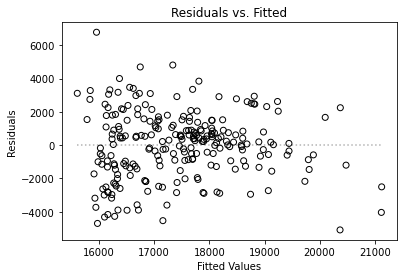

In [31]:
residuals = att_reg_model.resid
fitted = att_reg_model.fittedvalues

fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.set_ylabel('Residuals') 
ax.set_xlabel('Fitted Values')
ax.set_title("Residuals vs. Fitted")
ax.plot([min(fitted), max(fitted)], [0,0], color = 'k', linestyle = ':', alpha = .3)

plt.savefig("residuals.pdf")

Text(0.5, 0, 'Implied Odds')

Text(0, 0.5, 'Attendance')

Text(0.5, 1.0, 'October Odds and Attendance')

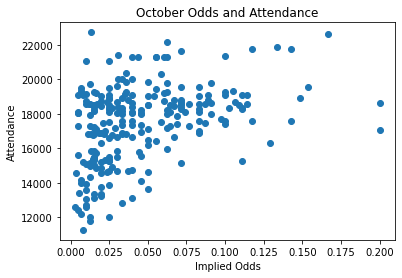

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(data.October_implied_odds, data.HM_AVG)
ax1.set_xlabel('Implied Odds') 
ax1.set_ylabel('Attendance')
ax1.set_title("October Odds and Attendance")
fig.savefig("october.pdf")



Text(0.5, 0, 'Implied Odds')

Text(0, 0.5, 'Attendance')

Text(0.5, 1.0, 'January Odds and Attendance')

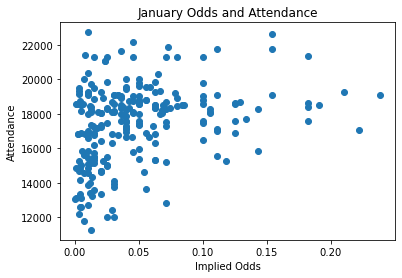

In [33]:
fig = plt.figure()
ax2 = fig.add_subplot(1,1,1)
ax2.scatter(data.Jan1_implied_odds, data.HM_AVG)
ax2.set_xlabel('Implied Odds') 
ax2.set_ylabel('Attendance')
ax2.set_title("January Odds and Attendance")
fig.savefig("january.pdf")

(array([ 5., 12., 16., 29., 24., 47., 74., 19., 10.,  7.]),
 array([11265. , 12411.9, 13558.8, 14705.7, 15852.6, 16999.5, 18146.4,
        19293.3, 20440.2, 21587.1, 22734. ]),
 <BarContainer object of 10 artists>)

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Attendance')

Text(0.5, 1.0, 'Attendance Histogram')

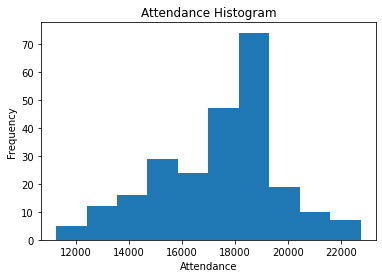

In [34]:
fig = plt.figure()
ax3 = fig.add_subplot(1,1,1)
ax3.hist(data.HM_AVG)
ax3.set_ylabel('Frequency') 
ax3.set_xlabel('Attendance')
ax3.set_title("Attendance Histogram")
fig.savefig("hist.pdf")

In [35]:
summary = data.describe()
round(summary, 2)

,October,Jan1,HM_AVG,PTSpct,GF_per_game,GA_per_game,Canada,US,October_implied_odds,Jan1_implied_odds
count,243.00,243.00,243.00,243.00,243.00,243.00,243.00,243.00,243.00,243.00
mean,4625.64,9309.42,17445.25,0.56,2.85,2.85,0.23,0.77,0.05,0.05
std,4843.44,29542.44,2272.94,0.09,0.33,0.31,0.42,0.42,0.04,0.05
min,500.00,420.00,11265.00,0.28,1.91,2.12,0.00,0.00,0.00,0.00
25%,1550.00,1600.00,15837.50,0.50,2.63,2.62,0.00,1.00,0.02,0.01
50%,3000.00,2800.00,18020.00,0.57,2.83,2.83,0.00,1.00,0.03,0.04
75%,6300.00,8000.00,18816.50,0.62,3.05,3.09,0.00,1.00,0.06,0.06
max,32500.00,400000.00,22734.00,0.78,3.96,3.76,1.00,1.00,0.20,0.24
